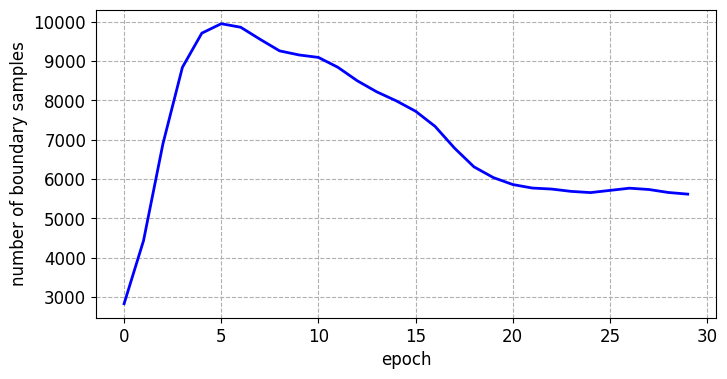

In [11]:
import json
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def get_hard_sample(file_dir, name):
    f = open(file_dir, encoding="utf-8")
    lines = f.readlines()      #读取全部内容 ，并以列表方式返回
    elements = []
    for line in lines:
        if name in line:
            element = line.split(":")[-1][1:]
            elements.append(int(element))
    return elements


LC_SC_LC = get_hard_sample('/home/linhuadong/DNFNet/jobs/prw_cpcl_all_tricks/work_dirs/prw/20230717_224558.log', name='uncertainty sample number')
TC_SC= get_hard_sample('/home/linhuadong/DNFNet/jobs/prw_cpcl_TC_SC_boundary_sample/work_dirs/prw/20230717_230514.log', name='uncertainty sample number')
TC_LC = get_hard_sample('/home/linhuadong/DNFNet/jobs/prw_cpcl_TC_LC/work_dirs/prw/20230717_225837.log', name='uncertainty sample number')

name = ["LC_SC_LC", "TC_SC", "TC_LC"]
lists = [LC_SC_LC, TC_SC, TC_LC]
colors = ['b', 'g','maroon', 'c','m','y', 'k', 'r']
markers = ['o', 'v', '^', 'D', '>', 's', '*', '+']

plt.figure(figsize=(8, 4), dpi=100)
plt.grid(linestyle="--")  # 设置背景网格线为虚线

for i in range(1):
    y_smoothed = gaussian_filter1d(lists[i], sigma=1)
    plt.plot(range(len(lists[i])), y_smoothed, c=colors[i], label=name[i], linewidth=2)

plt.xticks(fontsize=12)  # 默认字体大小为10
plt.yticks(fontsize=12)
plt.xlabel("epoch", fontsize=12)
plt.ylabel("number of boundary samples", fontsize=12)


# plt.legend(loc=0, prop = {'size':12})
# plt.savefig('./filename.jpg', format='jpg', bbox_inches='tight')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
plt.savefig('../file/boundary_samples.eps', dpi=100, format='eps', bbox_inches='tight', pad_inches=0)
plt.show()